In [647]:
%matplotlib inline
import pandas as pd
import cycluster as cy
import os.path as op
import numpy as np
import palettable
from custom_legends import colorLegend
import seaborn as sns
from hclusterplot import *
import matplotlib.pyplot as plt
import pprint
import openpyxl
from plotnine import *
# import preprocessing as prep
import scipy.cluster.hierarchy as sch
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import sklearn
import matplotlib as mpl
import itertools
from scipy.spatial import distance
import os
import plotting as plot

In [683]:
sns.set_context('paper')
path = "./"
inf = "NIC FPID Cytokines JC 1.csv"
dataFilename = op.join(path,inf)

"""A long df has one analyte measurement per row"""
longDf = pd.read_csv(dataFilename)


#splitVar = "Age"
#splitCrit = 

longDf['Sample']=longDf['ID'].astype(str)+'_'+longDf['Strain']# longDf = longDf.drop(columns= ['ID', 'Influenza.Status', 'Strain', 'Age', 'Sex', 'CMV.Status', 'EBV.Status', 'HSV1_2.Status', 'HHV6.Status', 'VZV.Status'])

Selection = "HSV1_2"
Age_Selection = (17, 65)

# longDf = longDf.loc[longDf.Strain.isin(['{}'.format(Selection)])]
# longDf = longDf.loc[longDf.Age.isin(list(range(Age_Selection[0], Age_Selection[1])))]
# longDf = longDf.loc[~longDf.Age.isin(list(range(0,15)))]
longDf = longDf.loc[longDf.HSV1_2.isin([1])]
# longDf = longDf.loc[longDf.Sex.isin(['F'])]


longDf = longDf.drop(columns=['ID', 'Influenza.Status', 'Age', 'Sex', 'CMV', 'EBV', 'HSV1_2', 'HHV6', 'VZV'])
# longDf = longDf.drop(columns=['ID', 'Influenza.Status', 'Strain', 'Sex','Age', 'CMV.Status', 'EBV.Status', 'HSV1_2.Status', 'HHV6.Status', 'VZV.Status'])



longDf = longDf.drop(columns= ["Strain"])


Df_1 = longDf
Df_1

Df_1 = longDf.pivot_table(index='Sample')
# #Df.to_excel('Example_1.xlsx')
# #Df

LogDf = Df_1.apply(func=np.log,axis=0)
LogDf


,EGF,Eotaxin,FGF-2,Flt3 Ligand,Fractalkine,G-CSF,GM-CSF,GRO,IFNa2,IFNg,...,MCP-1,MCP-3,MDC,MIP-1a,MIP-1b,TGF-a,TNFa,TNFb,VEGF,sCD40L
Sample,,,,,,,,,,,,,,,,,,,,,
101_B,6.304705,4.487400,2.554899,2.772589,5.991165,3.580459,1.305626,7.814400,3.452524,1.000632,...,6.220550,2.772589,6.621059,1.669592,3.520461,1.786747,1.523880,2.232163,3.982668,9.168163
102_B,6.052607,4.504687,5.869918,3.975936,6.363045,4.244200,4.872752,7.548556,5.305988,3.169265,...,6.376387,4.448984,6.074771,2.699346,4.377265,2.687167,3.169265,2.232163,5.812756,8.708144
103_B,6.287896,5.060694,2.554899,2.772589,5.991165,3.137666,1.305626,7.629004,3.452524,2.469793,...,6.296225,2.772589,6.955593,1.669592,4.299867,1.458615,2.613007,2.232163,4.878170,9.432924
104_B,7.040536,4.678699,6.549307,2.772589,5.991165,5.039352,4.116432,7.588324,3.452524,1.867176,...,5.528158,2.772589,7.395108,3.190476,4.108247,2.113843,2.991724,2.232163,4.672642,8.755107
105_B,6.889316,5.250072,4.685274,3.498022,5.991165,4.472553,2.979095,7.672758,3.986202,2.918311,...,6.445275,2.772589,7.051856,3.219676,4.683519,2.916148,3.397189,2.232163,6.400540,9.594786
106_B,6.281968,5.317237,3.925926,3.421000,5.991165,4.111202,1.305626,7.914252,4.319752,1.713798,...,7.472501,2.772589,6.697244,2.287471,4.423408,1.699279,2.515274,2.232163,4.878170,9.594786
107_B,6.390425,5.072044,4.609660,2.772589,5.991165,3.945458,2.461297,7.914252,4.765331,0.824175,...,6.944087,2.772589,7.346010,1.669592,4.031050,2.929058,2.933857,2.232163,3.982668,9.594786
109_B,6.201239,4.652340,5.161466,2.772589,5.991165,4.534318,3.766535,7.466228,4.885299,2.263844,...,6.743046,3.549330,7.229839,1.669592,3.932022,2.502255,3.149740,2.232163,4.672642,8.752107
112_B,5.480972,4.489984,3.985273,2.772589,6.321865,4.916032,3.288029,6.749416,4.319752,0.824175,...,5.793776,2.772589,7.226936,1.859418,3.391147,1.022451,2.655352,2.232163,4.955968,7.464510


In [684]:
def meanSubNormalize(cyDf, cyVars=None, compCommVars=None, meanVar=None):
    """Normalize cytokine columns by the log-mean for each patient, within each compartment.
    The point is that if cytokine concentrations are generally high for one sample or another,
    this might dominate the covariation of cytokines across patients (both within/across compartments).

    We subtract off the mean since the "overall inflamation" level
    that we are adjusting for would probably be on the fold-change concentration scale.
    (additive on the log-concentration scale)"""
    def _normFuncSub(vec):
        out = vec - muVec
        return out

    if cyVars is None:
        cyVars = cyDf.columns
    if meanVar is None:
        meanVar = 'Mean'
    if compCommVars is None:
        cyDf.columns

    """No standardizing cytokines before taking the mean (need units to stay in log-concentration)"""
    muVec = cyDf[cyDf.columns].mean(axis=1)
    
    ndf = cyDf.copy()
    ndf.loc[:, cyDf.columns] = ndf[cyDf.columns].apply(_normFuncSub)
    ndf.loc[:, meanVar] = muVec
    return ndf



Df_values = longDf.drop(columns="Sample")
Df_values = Df_values.drop(columns="GRO")
# print(Df_values)
# muVec = Df_values[Df_values.columns].mean(axis=1)
# print(Df_values[Df_values.columns])
# print(muVec)
# print(Df_values.isnull().sum())
df_prep = meanSubNormalize(LogDf)
df_prep = df_prep.drop(columns = "Mean")
print(df_prep)

               EGF   Eotaxin     FGF-2  Flt3 Ligand  Fractalkine     G-CSF  \
Sample                                                                       
101_B     3.635826  1.818521 -0.113980     0.103710     3.322286  0.911580   
102_B     2.294885  0.746965  2.112197     0.218215     2.605324  0.486479   
103_B     3.489862  2.262661 -0.243134    -0.025445     3.193131  0.339632   
104_B     4.072957  1.711120  3.581728    -0.194990     3.023585  2.071773   
105_B     3.395959  1.756715  1.191918     0.004665     2.497808  0.979196   
106_B     3.161828  2.197098  0.805787     0.300861     2.871025  0.991062   
107_B     3.286967  1.968585  1.506202    -0.330870     2.887706  0.841999   
109_B     2.837229  1.288330  1.797456    -0.591421     2.627155  1.170309   
112_B     2.643461  1.652472  1.147762    -0.064923     3.484353  2.078520   
113_B     1.537536  0.474262  1.055461    -0.567432     2.483449  0.973996   
114_B     2.649505  1.057234 -0.534488    -0.316798     2.901777

In [236]:
def computeGapStat(data, pdistFunc, clusterFunc, maxK, bootstraps=10):
    """Compute the gap statistic, varying the number of clusters (K)
    to determine the optimal number of clusters.

    The optimal number of clusters is the smallest K for which:

    $Gap(k) - (Gap(k+1) - \sigma_{k+1}) > 0$

    The statistic is described here:
    Tibshirani, R., Walther, G., Hastie, T., 2001. Estimating the number of clusters in a data set via the gap statistic.
        J. R. Stat. Soc. Ser. B. (Statistical Methodol.) 63, 411-423

    and a good example of python code is here:
    https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/


    Parameters
    ----------
    data : np.array or pd.DataFrame
        Matrix of data with observations on the rows and variables along the columns.
        Data will be row-bootstrapped for each column to create null datasets.
    pdistFunc : function
        Function for computing pairwise distance matrix from data.
        Use partial to prespecify metric arguments if neccessary.
    clusterFunc : function
        Function that takes the distance matrix and a prespecified number of clusters
        and returns cluster labels.
        Use partial to prespecify method arguments if neccessary.
    maxK : int
        Maximum number of clusters to consider.
    bootstraps : int
        Number of bootstrap samples to compute for each K.

    Returns
    -------
    lsICD : np.array of shape (maxK,)
        Log of the sum of the intra cluster distances (LSICD), for each K
    mBSICD : np.array of shape (maxK,)
        Average LSICD over random bootstraps, for each K
    errBSICD : np.array of shape (maxK,)
        Bootstrap error LSICD over random bootstraps, for each K
    gap : np.array of shape (maxK,)
        Gap statistic for each K
    """
    dmat = pdistFunc(data)

    lsICD = np.zeros(maxK)
    mBSICD = np.zeros(maxK)
    stdBSICD = np.zeros(maxK)

    for K in (np.arange(maxK) + 1):
        labels = clusterFunc(dmat, K)
        lsICD[K - 1] = np.log(_intra_cluster_distances(dmat, labels))
        reps = np.zeros(bootstraps)
        for i in range(bootstraps):
            tmpDmat = pdistFunc(_bootstrap_each_column(data))
            labels = clusterFunc(tmpDmat, K)
            reps[i] = np.log(_intra_cluster_distances(tmpDmat, labels))
        mBSICD[K - 1] = reps.mean()
        stdBSICD[K - 1] = reps.std()

    gap = mBSICD - lsICD
    errBSICD = np.sqrt(1 + 1. / bootstraps) * stdBSICD

    return lsICD, mBSICD, errBSICD, gap

def _intra_cluster_distances(dmat, labels):
    """Sum of the intra-cluster distances (Wk)"""
    K = len(np.unique(labels))
    tot = 0
    for k in np.unique(labels):
        ind = labels == k
        nk = ind.sum()
        if isinstance(dmat, pd.DataFrame):
            tot += (dmat.loc[ind, :].loc[:, ind].values.flatten() ** 2).sum() / (2 * nk)
        else:
            tot += (dmat[ind, :][:, ind].flatten() ** 2).sum() / (2 * nk)
    return tot

def _bootstrap_each_column(d):
    """Returns a copy of data with row-bootstraped values
    substituted for each column independently."""
    out = d.copy()

    if isinstance(out, pd.DataFrame):
        out = out.apply(lambda col: col[np.floor(np.random.rand(len(col)) * len(col)).astype(int)], axis=0, raw=True)
    else:
        for ci in range(d.shape[1]):
            rind = np.floor(np.random.rand(d.shape[0]) * d.shape[0]).astype(int)
            out[:, ci] = out[rind, ci]

    return out



Gap = computeGapStat(LogDf, cy.corrDmatFunc, cy.hierClusterFunc, 20, bootstraps=10)
print(Gap[3])

[0.55170876 0.79235372 0.84079217 0.91019852 0.96143551 1.01642227
 1.06017728 1.11076641 1.1722093  1.18653249 1.26688146 1.28116638
 1.30719188 1.32398804 1.33964837 1.37216793 1.41274911 1.43703171
 1.46793307 1.49280006]


C:\Users\NBrah\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


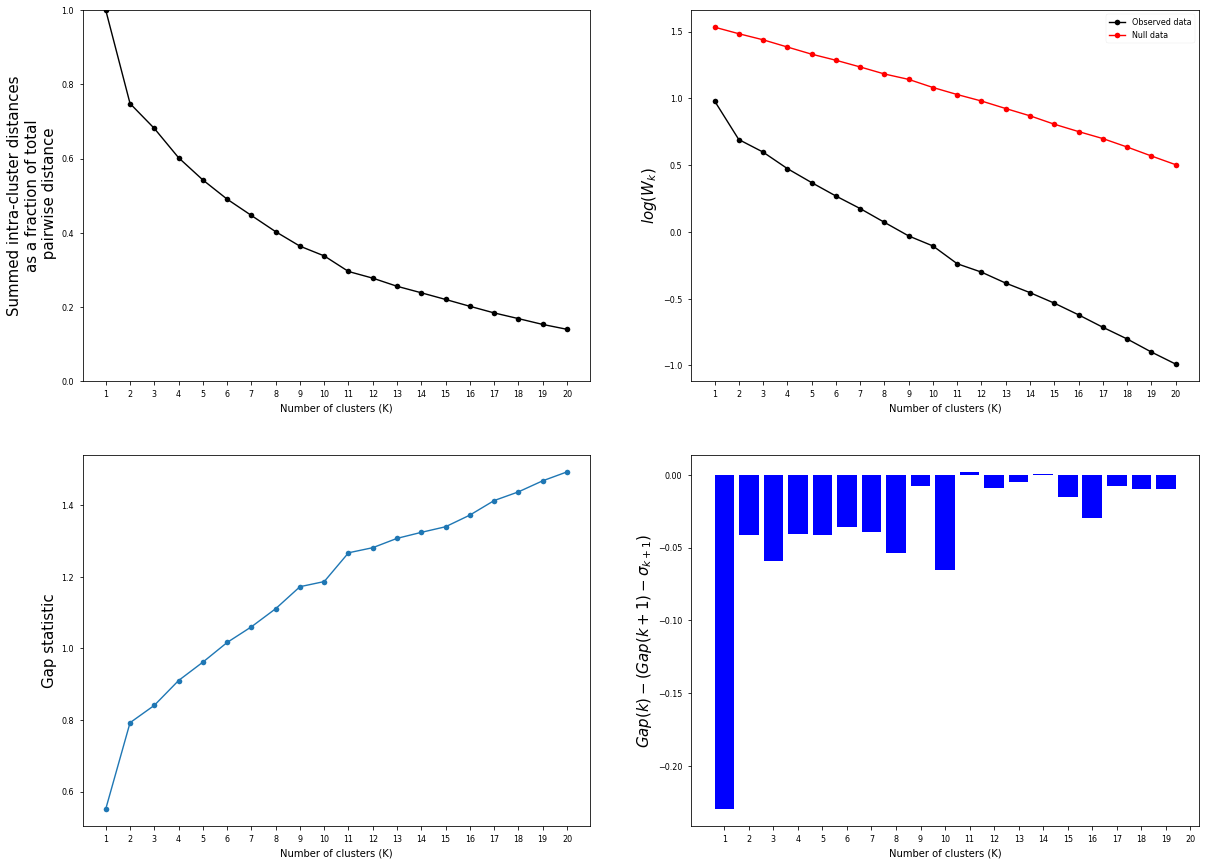

In [237]:
def plotGapStat(lsICD, mBSICD, errBSICD, gap):
    """Descriptive plot of the Gap statistic.
    Parameters are simply the output from computeGapStat."""

    maxK = len(gap)
    plt.clf()
    plt.subplot(2, 2, 1)
    plt.plot(np.arange(maxK) + 1, np.exp(lsICD) / np.exp(lsICD[0]), 'o-', color='black', label='Observed data')
    plt.xticks(np.arange(maxK) + 1)
    plt.ylabel('Summed intra-cluster distances\nas a fraction of total\n pairwise distance', fontsize = 15)
    plt.xlabel('Number of clusters (K)', fontsize = 10)
    plt.ylim((0, 1))

    plt.subplot(2, 2, 2)
    plt.plot(np.arange(maxK) + 1, lsICD, 'o-', color='black', label='Observed data')
    plt.plot(np.arange(maxK) + 1, mBSICD, 'o-', color='red', label='Null data')
    plt.xticks(np.arange(maxK) + 1)
    plt.ylabel('$log(W_k)$', fontsize = 15)
    plt.xlabel('Number of clusters (K)', fontsize = 10)
    plt.legend(loc=0)

    plt.subplot(2, 2, 3)
    plt.plot(np.arange(maxK) + 1, gap, 'o-')
    plt.xticks(np.arange(maxK) + 1)
    plt.ylabel('Gap statistic', fontsize = 15)
    plt.xlabel('Number of clusters (K)', fontsize = 10)

    plt.subplot(2, 2, 4)
    q = gap[:-1] - (gap[1:] - errBSICD[1:])
    plt.bar(left=np.arange(maxK - 1) + 1, height=q, color='blue', align='center')
    plt.xticks(np.arange(maxK) + 1)
    plt.ylabel('$Gap(k) - (Gap(k+1) - \sigma_{k+1})$', fontsize = 15)
    plt.xlabel('Number of clusters (K)', fontsize = 10)
    # plt.tight_layout()
    plt.savefig('Gap_Stat_All.png')
plt.figure(figsize = (20,15))

    
plot_gap = plotGapStat(Gap[0], Gap[1], Gap[2], Gap[3])
plot_gap

In [685]:

"""A wide df has one sample per row (analyte measurements across the columns)"""



def _prepCyDf(tmp, K=3, normed=False, cluster="Cluster", percent= 0, rtol= None, atol= None):
#     dayDf = longDf
#     tmp = tmp.pivot_table(index='ptid', columns='cytokine', values='log10_conc')
    if rtol or atol == None:
        noVar = tmp.columns[np.isclose(tmp.std(), 0)].tolist()
    else:
        noVar = tmp.columns[np.isclose(tmp.std(), 0, rtol, atol)].tolist()
    naCols = tmp.columns[(tmp.isnull().sum()) / (((tmp.isnull()).sum()) + (tmp.notnull().sum())) > (percent / 100)].tolist() 
    keepCols = [c for c in tmp.columns if not c in (noVar + naCols)]
#     dayDf = dayDf.pivot_table(index='ptid', columns='cytokine', values='log10_conc')[keepCols]
    """By setting normed=True the data our normalized based on correlation with mean analyte concentration"""
    rcyc = cy.cyclusterClass(studyStr='ADAMTS', sampleStr=cluster, normed=normed, rCyDf=tmp)
    rcyc.clusterCytokines(K=K, metric='pearson-signed', minN=0)
    rcyc.printModules()
    return rcyc
        

rcyc = _prepCyDf(df_prep, K=8, normed=False, cluster="All", percent= 10)

print("done")



All1
EGF
Eotaxin
GRO
IL-6
IL-8
MCP-1
MDC
MIP-1a
MIP-1b
TGF-a
TNFa
sCD40L

All2
IL-13
IL-2
IL-5
MCP-3
TNFb

All3
Flt3 Ligand
Fractalkine
IFNg
IL-17A
IL-1a
IL12-p70
VEGF

All4
IL-10
IL-1RA
IP-10

All5
IL-15
IL-1b
IL-3

All6
IL-9

All7
IL-4
IL-7

All8
FGF-2
G-CSF
GM-CSF
IFNa2
IL-12p40

done


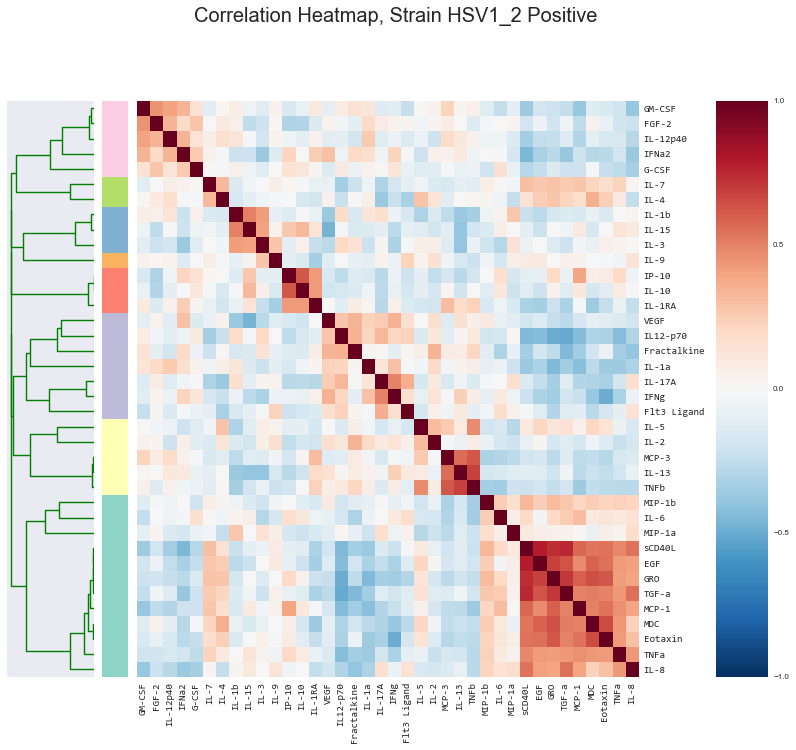

In [686]:
def _colors2labels(labels, setStr = 'Set3', cmap = None):
    """Return pd.Series of colors based on labels"""
    if cmap is None:
        N = max(3, min(12, len(np.unique(labels))))
        cmap = palettable.colorbrewer.get_map(setStr, 'Qualitative', N).mpl_colors
    cmapLookup = {k:col for k, col in zip(sorted(np.unique(labels)), itertools.cycle(cmap))}
    return labels.map(cmapLookup.get)
def _clean_axis(ax):
    """Remove ticks, tick labels, and frame from axis"""
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in list(ax.spines.values()):
        sp.set_visible(False)
    ax.grid(False)
    # ax.set_axis_bgcolor('white')
def plotHierClust(dmatDf, Z, cmap, vRange, filename, savefile=False, labels=None, titleStr=None, tickSz= 10, cmapLabel=''):
    """Display a hierarchical clustering result."""
    
    vmin, vmax = vRange
    fig = plt.gcf()
    fig.clf()

    if labels is None:
        denAX = fig.add_subplot(GridSpec(1, 1, left=0.05, bottom=0.05, right=0.15, top=0.85)[0, 0])
        heatmapAX = fig.add_subplot(GridSpec(1, 1, left=0.16, bottom=0.05, right=0.78, top=0.85)[0, 0])
        scale_cbAX = fig.add_subplot(GridSpec(1, 1, left=0.87, bottom=0.05, right=0.93, top=0.85)[0, 0])
    else:
        denAX = fig.add_subplot(GridSpec(1, 1, left=0.05, bottom=0.05, right=0.15, top=0.85)[0, 0])
        cbAX = fig.add_subplot(GridSpec(1, 1, left=0.16, bottom=0.05, right=0.19, top=0.85)[0, 0])
        heatmapAX = fig.add_subplot(GridSpec(1, 1, left=0.2, bottom=0.05, right=0.78, top=0.85)[0, 0])
        scale_cbAX = fig.add_subplot(GridSpec(1, 1, left=0.87, bottom=0.05, right=0.93, top=0.85)[0, 0])

    my_norm = mpl.colors.Normalize(vmin = vmin, vmax = vmax)

    """Dendrogaram along the rows"""
    plt.sca(denAX)
    denD = sch.dendrogram(Z, p = 2, truncate_mode = 'none', color_threshold=np.inf, orientation='left')
    colInd = denD['leaves']
    _clean_axis(denAX)

    if not labels is None:
        cbSE = _colors2labels(labels)
        axi = cbAX.imshow([[x] for x in cbSE.iloc[colInd].values], interpolation='nearest', aspect='auto', origin='lower')
        
        _clean_axis(cbAX)

    """Heatmap plot"""
    axi = heatmapAX.imshow(dmatDf.values[colInd,:][:, colInd], interpolation='nearest', aspect='auto', origin='lower', norm=my_norm, cmap=cmap)
    _clean_axis(heatmapAX)

    """Column tick labels along the rows"""
    if tickSz is None:
        heatmapAX.set_yticks(())
        heatmapAX.set_xticks(())
    else:
        heatmapAX.set_yticks(np.arange(dmatDf.shape[1]))
        heatmapAX.yaxis.set_ticks_position('right')
        heatmapAX.set_yticklabels(dmatDf.columns[colInd], fontsize=tickSz, fontname='Consolas')

        """Column tick labels"""
        heatmapAX.set_xticks(np.arange(dmatDf.shape[1]))
        heatmapAX.xaxis.set_ticks_position('top')
        xlabelsL = heatmapAX.set_xticklabels(dmatDf.columns[colInd], fontsize=tickSz, rotation=90, fontname='Consolas')

#         """Remove the tick lines"""
#         for l in heatmapAX.get_xticklines() + heatmapAX.get_yticklines(): 
#             l.set_markersize(0)

    """Add a colorbar"""
    cb = fig.colorbar(axi, scale_cbAX) # note that we could pass the norm explicitly with norm=my_norm
    cb.set_label(cmapLabel)
    cb.set_ticks([-1, -0.5, 0, 0.5, 1])
    """Make colorbar labels smaller"""
    for t in cb.ax.yaxis.get_ticklabels():
        t.set_fontsize('small')
    heatmapAX.xaxis.tick_bottom()
    heatmapAX.invert_xaxis()
    if titleStr:
        plt.suptitle(titleStr, fontsize = 20)
    if savefile:
        for file in os.listdir("./Correlation Plots"):
            if file == filename+'.png':
                raise Exception('Directory already contains a file with this filename!')
            else:
                path = "./Correlation Plots/"
                file_name = op.join(path, filename+'.png')
                plt.savefig(file_name)
plt.figure(figsize = (12,10))


        
plotHierClust(rcyc.cyDf.corr(method="pearson", min_periods=1), 
              rcyc.Z, 
              filename = 'Adjusted Strain HSV1_2 Positive',
              cmap = palettable.colorbrewer.diverging.RdBu_11_r.mpl_colormap, 
              vRange = (-1, 1), labels = rcyc.labels, 
              titleStr = "Correlation Heatmap, Strain HSV1_2 Positive",
              savefile = True)

In [ ]:
Z = sch.linkage(compressedDmat, method='complete')
denD_1 = sch.dendrogram(Z, p = 300, color_threshold=np.inf, orientation='left')
colInd_1 = denD_1['leaves']
labels = (rcyc.labels.to_frame())
labels_1 = labels.index[colInd_1]

In [386]:
# print(labels.index)
unknown = (rcyc.cyDf.corr(method="pearson", min_periods=1).values)
Df_2 = pd.DataFrame(unknown)
Df_2.to_csv("Cluster_Data.csv")
# print(unknown)
with sns.axes_style('white'):
    plt.figure(figsize = (20,15))
    g2 = sns.clustermap(unknown, col_linkage = rcyc.Z, row_linkage = rcyc.Z, vmin = -1, vmax = 1, square = True, cbar_kws={"ticks":[-1, -0.5, 0, 0.5, 1]}, cmap = palettable.colorbrewer.diverging.RdBu_11_r.mpl_colormap)
    g2.ax_col_dendrogram.set_visible(False)
    g2.ax_row_dendrogram.set_visible(True)
    g2.ax_row_dendrogram.invert_yaxis()
    compressedDmat = distance.squareform(rcyc.pwrel.values)
    plt.setp(g2.ax_heatmap.set_xticklabels(labels.index[colInd_1]), rotation=90)
    plt.setp(g2.ax_heatmap.set_yticklabels(labels.index[colInd_1]), rotation=0)
    g2.fig.suptitle('Correlation Heatmap', fontsize = 30)
    g2.ax_heatmap.invert_yaxis()
    g2.ax_heatmap.invert_xaxis()
#     g2.cax.set_visible(False)

# g2.savefig('Graph_H3N2.png')

#     plt.setp(g2.ax_heatmap.yaxis.set_majorticklabels(labels.index), rotation=0)
# ax.set_title('Correlation Heatmap', fontsize = 30)

# with sns.axes_style("white"):
#     plt.figure(figsize = (16,10))
#     ax = sns.heatmap(unknown, vmin = -1, vmax = 1, square = True, cbar_kws={"ticks":[-1, -0.5, 0, 0.5, 1]}, cmap = palettable.colorbrewer.diverging.RdBu_11_r.mpl_colormap)
#     ax.set_title('Correlation Heatmap', fontsize = 30)
#     ax.invert_yaxis()

6
7


In [ ]:
# g2.savefig('Graph_{}.png'.format(Selection))
# g2.savefig('Graph_{}.png'.format(Age_Selection))
g2.savefig('DendroComp_1.png')

OSError: [Errno 22] Invalid argument: './Correlation Plots/Pairwise reliability, Strain HSV1_2 Positive.png'

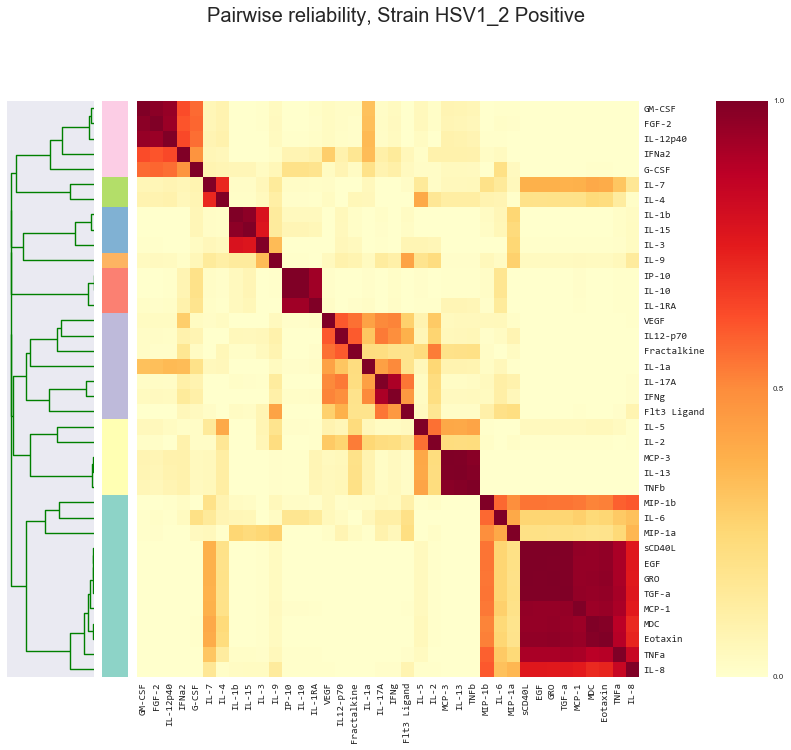

In [687]:
# plt.figure(43, figsize = (15.5, 9.5))
# colInds = plot.plotHierClust(1 - rcyc.pwrel,
#                                rcyc.Z,
#                                labels=rcyc.labels,
#                                titleStr='Pairwise reliability',
#                                vRange=(0, 1),
#                                tickSz='large')


def _colors2labels(labels, setStr = 'Set3', cmap = None):
    """Return pd.Series of colors based on labels"""
    if cmap is None:
        N = max(3, min(12, len(np.unique(labels))))
        cmap = palettable.colorbrewer.get_map(setStr, 'Qualitative', N).mpl_colors
    cmapLookup = {k:col for k, col in zip(sorted(np.unique(labels)), itertools.cycle(cmap))}
    return labels.map(cmapLookup.get)
def _clean_axis(ax):
    """Remove ticks, tick labels, and frame from axis"""
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in list(ax.spines.values()):
        sp.set_visible(False)
    ax.grid(False)
    # ax.set_axis_bgcolor('white')
def plotHierClust(dmatDf, Z, cmap, vRange, filename, savefile=False, labels=None, titleStr=None, tickSz= 10, cmapLabel=''):
    """Display a hierarchical clustering result."""
    
    vmin, vmax = vRange
    fig = plt.gcf()
    fig.clf()

    if labels is None:
        denAX = fig.add_subplot(GridSpec(1, 1, left=0.05, bottom=0.05, right=0.15, top=0.85)[0, 0])
        heatmapAX = fig.add_subplot(GridSpec(1, 1, left=0.16, bottom=0.05, right=0.78, top=0.85)[0, 0])
        scale_cbAX = fig.add_subplot(GridSpec(1, 1, left=0.87, bottom=0.05, right=0.93, top=0.85)[0, 0])
    else:
        denAX = fig.add_subplot(GridSpec(1, 1, left=0.05, bottom=0.05, right=0.15, top=0.85)[0, 0])
        cbAX = fig.add_subplot(GridSpec(1, 1, left=0.16, bottom=0.05, right=0.19, top=0.85)[0, 0])
        heatmapAX = fig.add_subplot(GridSpec(1, 1, left=0.2, bottom=0.05, right=0.78, top=0.85)[0, 0])
        scale_cbAX = fig.add_subplot(GridSpec(1, 1, left=0.87, bottom=0.05, right=0.93, top=0.85)[0, 0])

    my_norm = mpl.colors.Normalize(vmin = vmin, vmax = vmax)

    """Dendrogaram along the rows"""
    plt.sca(denAX)
    denD = sch.dendrogram(Z, p = 2, truncate_mode = 'none', color_threshold=np.inf, orientation='left')
    colInd = denD['leaves']
    _clean_axis(denAX)

    if not labels is None:
        cbSE = _colors2labels(labels)
        axi = cbAX.imshow([[x] for x in cbSE.iloc[colInd].values], interpolation='nearest', aspect='auto', origin='lower')
        
        _clean_axis(cbAX)

    """Heatmap plot"""
    axi = heatmapAX.imshow(dmatDf.values[colInd,:][:, colInd], interpolation='nearest', aspect='auto', origin='lower', norm=my_norm, cmap=cmap)
    _clean_axis(heatmapAX)

    """Column tick labels along the rows"""
    if tickSz is None:
        heatmapAX.set_yticks(())
        heatmapAX.set_xticks(())
    else:
        heatmapAX.set_yticks(np.arange(dmatDf.shape[1]))
        heatmapAX.yaxis.set_ticks_position('right')
        heatmapAX.set_yticklabels(dmatDf.columns[colInd], fontsize=tickSz, fontname='Consolas')

        """Column tick labels"""
        heatmapAX.set_xticks(np.arange(dmatDf.shape[1]))
        heatmapAX.xaxis.set_ticks_position('top')
        xlabelsL = heatmapAX.set_xticklabels(dmatDf.columns[colInd], fontsize=tickSz, rotation=90, fontname='Consolas')

#         """Remove the tick lines"""
#         for l in heatmapAX.get_xticklines() + heatmapAX.get_yticklines(): 
#             l.set_markersize(0)

    """Add a colorbar"""
    cb = fig.colorbar(axi, scale_cbAX) # note that we could pass the norm explicitly with norm=my_norm
    cb.set_label(cmapLabel)
    cb.set_ticks([-1, -0.5, 0, 0.5, 1])
    """Make colorbar labels smaller"""
    for t in cb.ax.yaxis.get_ticklabels():
        t.set_fontsize('small')
    heatmapAX.xaxis.tick_bottom()
    heatmapAX.invert_xaxis()
    if titleStr:
        plt.suptitle(titleStr, fontsize = 20)
    if savefile:
        for file in os.listdir("./Correlation Plots"):
            if file == filename+'.png':
                raise Exception('Directory already contains a file with this filename!')
            else:
                path = "./Correlation Plots/"
                file_name = op.join(path, filename+'.png')
                plt.savefig(file_name)
plt.figure(figsize = (12,10))


        

plotHierClust(1 - rcyc.pwrel,
                    cy.hierClusterFunc(rcyc.pwrel, returnLinkageMat=True, method = "complete")[1],
                    labels=rcyc.labels,
                    titleStr='Pairwise reliability, Strain HSV1_2 Positive',
                    vRange=(0, 1),
                    cmap = cm.YlOrRd,
                    filename = 'Pairwise reliability, Strain HSV1_2 Positive',
                    savefile = True)

In [569]:
print(1 - rcyc.pwrel)
print(rcyc.cyDf.corr(method="pearson", min_periods=1))

               EGF  Eotaxin  FGF-2  Flt3 Ligand  Fractalkine  G-CSF  GM-CSF  \
EGF          1.000    0.916  0.000        0.000        0.000  0.000   0.000   
Eotaxin      0.916    1.000  0.000        0.000        0.000  0.004   0.000   
FGF-2        0.000    0.000  1.000        0.058        0.040  0.454   0.828   
Flt3 Ligand  0.000    0.000  0.058        1.000        0.304  0.002   0.022   
Fractalkine  0.000    0.000  0.040        0.304        1.000  0.004   0.022   
G-CSF        0.000    0.004  0.454        0.002        0.004  1.000   0.414   
GM-CSF       0.000    0.000  0.828        0.022        0.022  0.414   1.000   
GRO          0.966    0.950  0.000        0.000        0.000  0.000   0.000   
IFNa2        0.000    0.000  0.628        0.008        0.038  0.414   0.792   
IFNg         0.000    0.000  0.064        0.726        0.244  0.014   0.014   
IL-10        0.012    0.026  0.000        0.000        0.000  0.376   0.006   
IL-12p40     0.000    0.000  0.698        0.012     

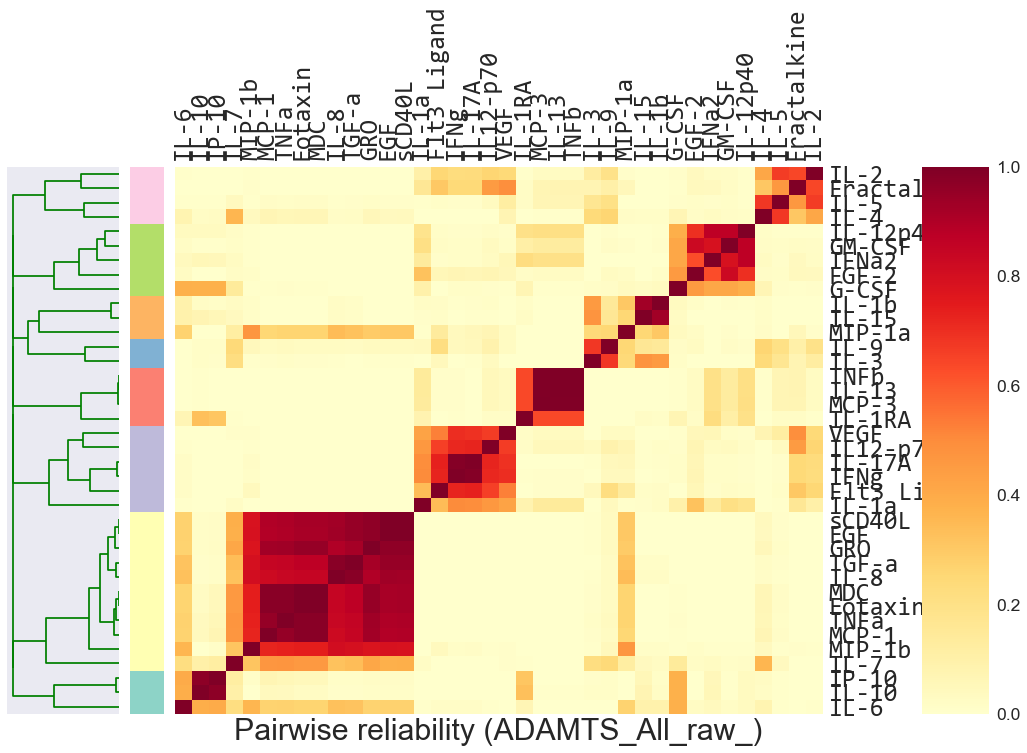

In [561]:
plt.figure(43, figsize = (15.5, 9.5))
colInds = plot.plotHierClust(1 - rcyc.pwrel,
                               rcyc.Z,
                               labels=rcyc.labels,
                               titleStr='Pairwise reliability (%s)' % rcyc.name,
                               vRange=(0, 1),
                               tickSz='large')


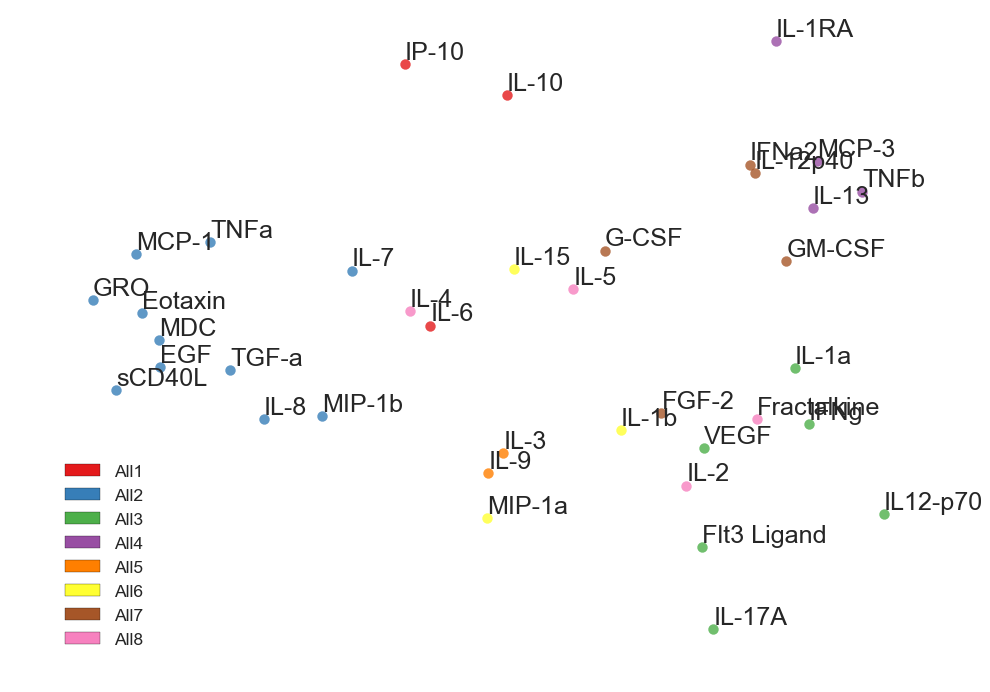

In [549]:
plt.figure(901, figsize=(13, 9.7))
plot.plotModuleEmbedding(rcyc.dmatDf, rcyc.labels, method='kpca', txtSize='large')
colors = palettable.colorbrewer.get_map('Set1', 'qualitative', len(np.unique(rcyc.labels))).mpl_colors
colorLegend(colors, ['%s%1.0f' % (rcyc.sampleStr, i) for i in np.unique(rcyc.labels)], loc='lower left')


In [15]:
import scipy.stats

"""df here should have one column per module and the genotype column"""
ptidDf = longDf[['ptid', 'sample', 'genotype', 'dpi']].drop_duplicates().set_index('ptid')
df = rcyc.modDf.join(ptidDf)

ind = df.genotype == 'WT'
col = 'LUNG1'
# stats.ranksums(df[col].loc[ind], df[col].loc[~ind])


